In [1]:
# Importe das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import stats
import datetime
from matplotlib.dates import DateFormatter
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from datetime import datetime, timedelta
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Importar a base de dados
df = pd.read_csv('livro.csv', header =0, sep = ',', decimal = ',')

In [3]:
# Colocando loan como um número inteiro
df['loan'] = df['loan'].astype(np.int32)
# Colocando a coluna data com formato de data
df['data'] = pd.to_datetime(df['data'])

In [4]:
df_treino = df[0:94]
df_teste = df[95:104]

In [5]:
# Análise descritiva

df.head()
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   data    104 non-null    datetime64[ns]
 1   loan    104 non-null    int32         
dtypes: datetime64[ns](1), int32(1)
memory usage: 1.3 KB


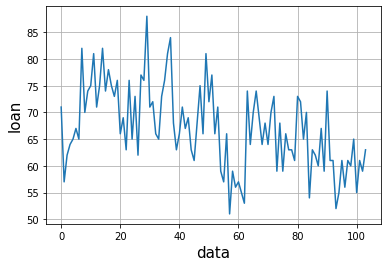

In [6]:

# plotar gráfico de consumo de eletricidade
plt.plot(df.index, df.loan)
plt.xlabel('data', fontsize = 15)
plt.ylabel('loan',fontsize = 15)
plt.grid()

In [7]:
# Verificando a Estacionariedade

test_estacionariedade = adfuller(df['loan'])
output = pd.Series(test_estacionariedade[0:4], index = ['Teste', 'p-valor','Lags','Número de observações usadas'])

for key, value in test_estacionariedade[4].items():
  output['Valor crítico(%s)' %key] = value
print(output)

Teste                            -3.289162
p-valor                           0.015370
Lags                              1.000000
Número de observações usadas    102.000000
Valor crítico(1%)                -3.496149
Valor crítico(5%)                -2.890321
Valor crítico(10%)               -2.582122
dtype: float64


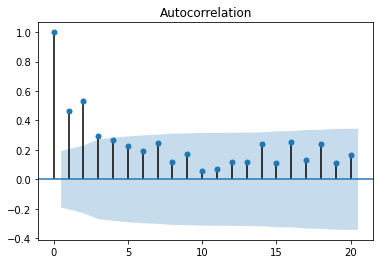

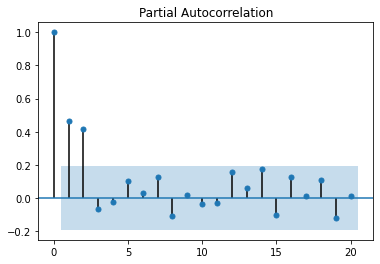

In [8]:
# Verificando as funções ACF e PACF
acf = plot_acf(df['loan'], lags = 20)
pacf = plot_pacf(df['loan'], lags = 20)

In [9]:
# Modelo Arima
model = ARIMA(df['loan'], order=(2,0,0))

model_fit = model.fit()

In [10]:
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                   loan   No. Observations:                  104
Model:                     ARMA(2, 0)   Log Likelihood                -337.462
Method:                       css-mle   S.D. of innovations              6.190
Date:                Sun, 31 Jan 2021   AIC                            682.924
Time:                        23:44:46   BIC                            693.502
Sample:                             0   HQIC                           687.209
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         66.8543      1.833     36.465      0.000      63.261      70.448
ar.L1.loan     0.2659      0.089      2.987      0.004       0.091       0.440
ar.L2.loan     0.4130      0.090      4.583      0.0

Plotting AR model


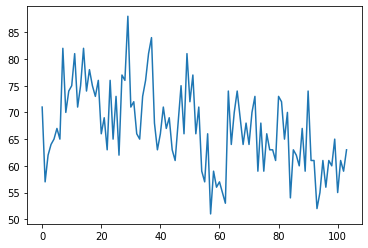

In [13]:

plt.plot(df['loan'])


print('Plotting AR model')

In [12]:
# Teste para verificar o modelo

acorr_ljungbox(model_fit.resid, lags=[10], boxpierce= False)

(array([5.44789914]), array([0.85932335]))